In [46]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

In [47]:
# import from modsim
from modsim import *

from functions_2 import *

In [48]:
tc =4      # time between contacts in days 
tr = 14            # recovery time in days

beta = 1 / tc      # contact rate in per day
gamma = 1 / tr     # recovery rate in per day

time=1000

init = State(s=1000000, i=1, r=0,v=0)
show(init)

vaccination_rate=0.001
vaccination_rate_1=0.005
quarantine_time=4

system = make_system(beta, gamma,time,init,vaccination_rate)
results = run_simulation(system, update_func)

In [49]:
system_1 = make_system_number(beta, gamma,time,init,vaccination_rate_1)
results_1 = run_simulation(system_1, update_func)

In [50]:

system2 = make_system(beta, gamma,time,init,0.000)

results2 = run_simulation(system2, update_func)




In [51]:
results_1.head()

,s,i,r,v
0,0.999999,9.999990e-07,0.000000e+00,0.000000
1,0.994999,1.178570e-06,7.142850e-08,0.005000
2,0.990024,1.387555e-06,1.195407e-07,0.009975
3,0.985073,1.631872e-06,1.582837e-07,0.014925
4,0.980147,1.917188e-06,1.949128e-07,0.019850


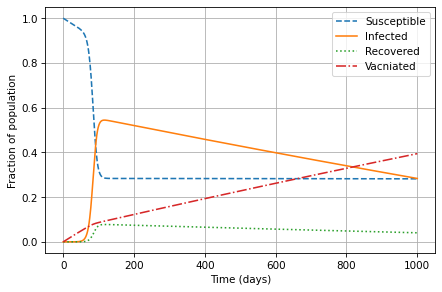

In [52]:
plot_results(results.s, results.i, results.r,results.v)

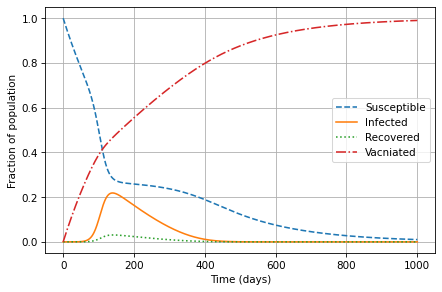

In [53]:
plot_results(results_1.s, results_1.i, results_1.r,results_1.v)

c:\Users\karol\Desktop\vaccination\functions_2.py:38: RuntimeWarning: overflow encountered in scalar multiply
  infected = system.beta * s*i
c:\Users\karol\Desktop\vaccination\functions_2.py:48: RuntimeWarning: invalid value encountered in scalar add
  s -= (infected+vacinated_s-recovered_not_immune)
c:\Users\karol\Desktop\vaccination\functions_2.py:49: RuntimeWarning: invalid value encountered in scalar subtract
  i += (infected - recovered)


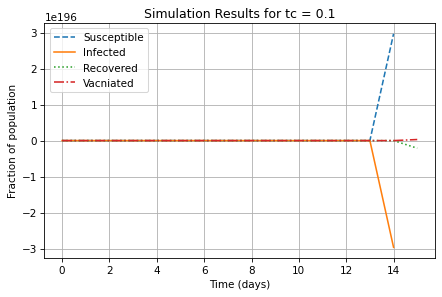

c:\Users\karol\Desktop\vaccination\functions_2.py:38: RuntimeWarning: overflow encountered in scalar multiply
  infected = system.beta * s*i
c:\Users\karol\Desktop\vaccination\functions_2.py:48: RuntimeWarning: invalid value encountered in scalar add
  s -= (infected+vacinated_s-recovered_not_immune)
c:\Users\karol\Desktop\vaccination\functions_2.py:49: RuntimeWarning: invalid value encountered in scalar subtract
  i += (infected - recovered)


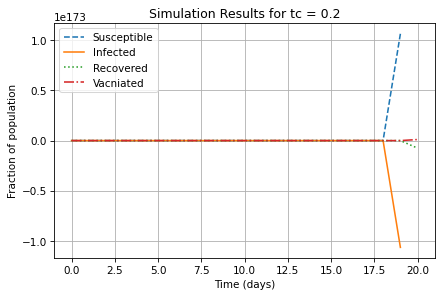

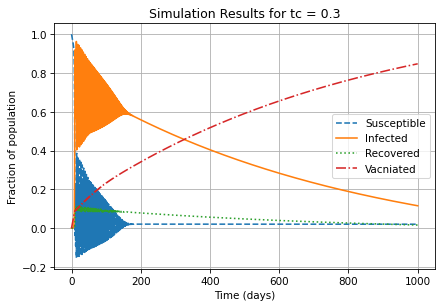

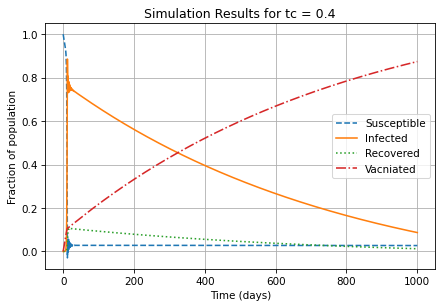

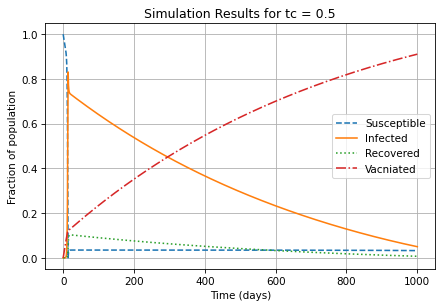

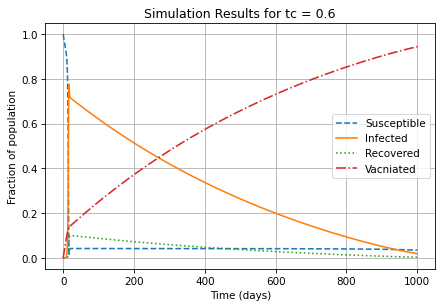

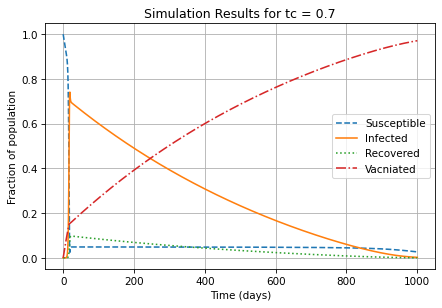

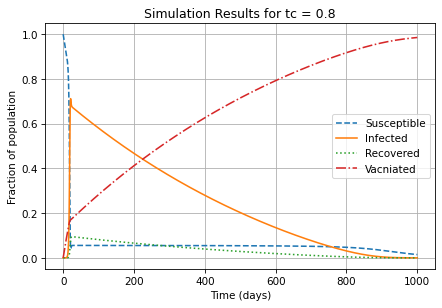

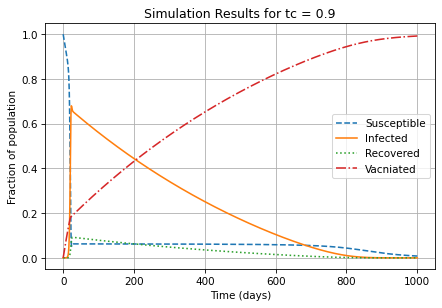

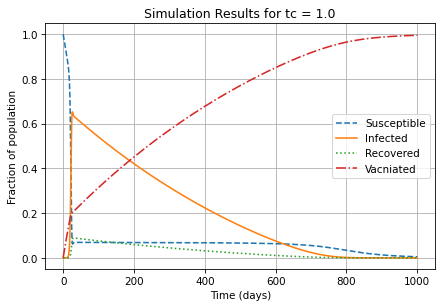

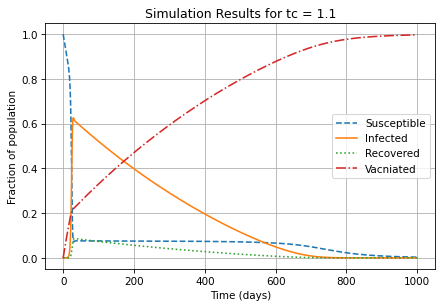

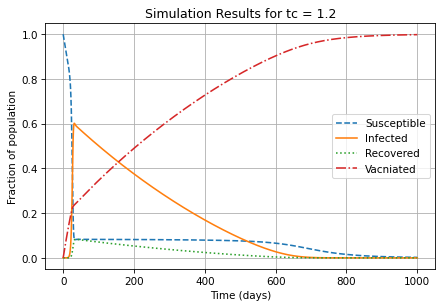

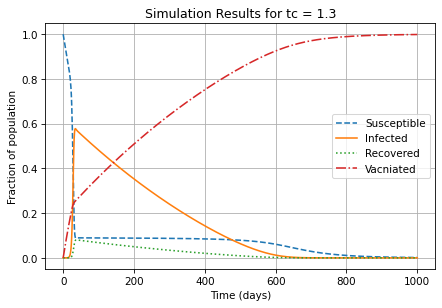

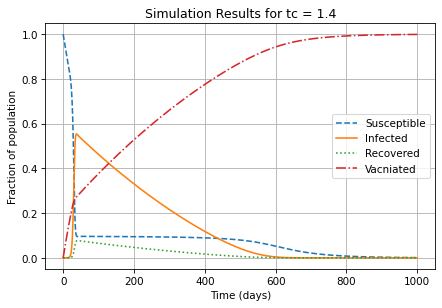

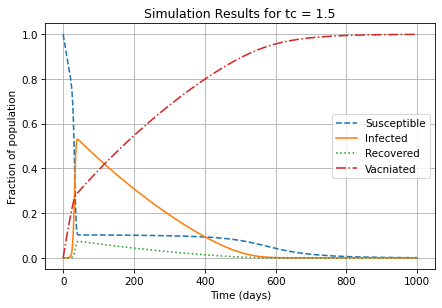

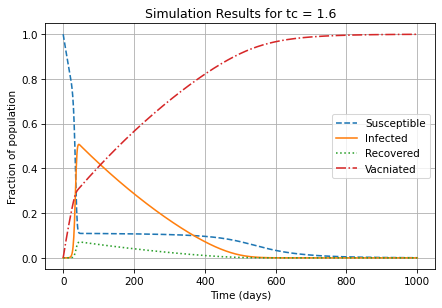

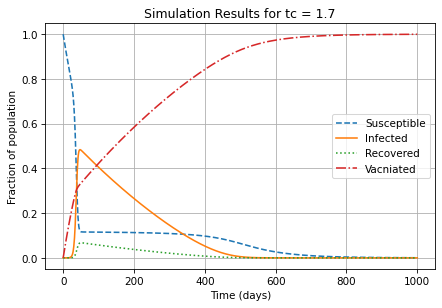

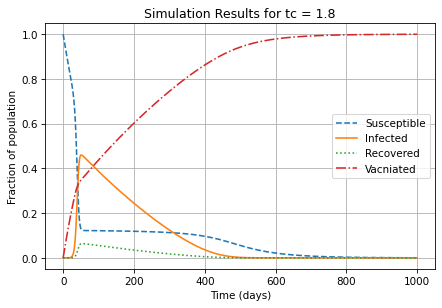

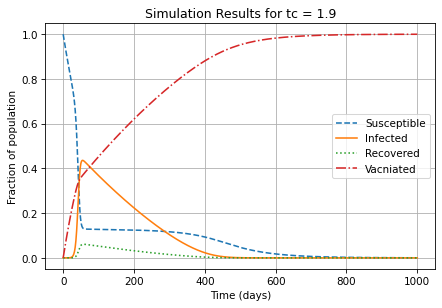

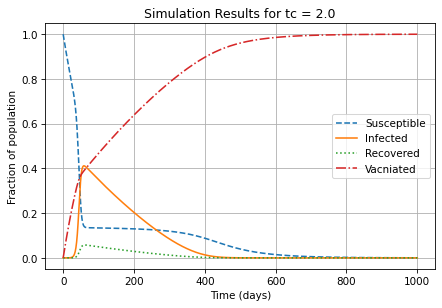

In [54]:
import matplotlib.pyplot as plt

# Function to create and run the simulation for given tc value
def simulate_and_plot(tc):
    beta = 1 / tc      # contact rate in per day

    system = make_system(beta, gamma, time, init, 0.01)
    results = run_simulation(system, update_func)
    
    # Plot the results
    plot_results(results.s, results.i, results.r, results.v)
    plt.title(f"Simulation Results for tc = {tc}")
    plt.show()

# Loop through the range of tc values and simulate for each
for tc_value in range(1, 21):
    tc = tc_value / 10.0  # Convert to float and divide by 10 to get values from 0.1 to 2
    simulate_and_plot(tc)

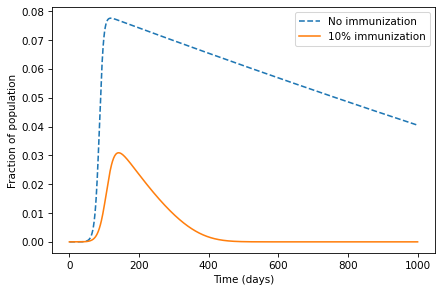

In [58]:
results.r.plot(style='--', label='No immunization')
results_1.r.plot(label='10% immunization')

decorate(xlabel='Time (days)',
         ylabel='Fraction of population')

In [56]:
fraction_array = linspace(0, 1, 21)
infected_sweep = sweep_immunity(fraction_array,beta,gamma,time,init)

TypeError: make_system() missing 1 required positional argument: 'vaccine_rate'

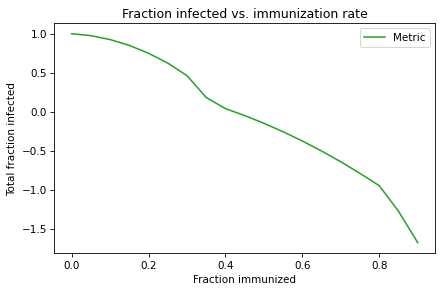

In [ ]:
infected_sweep.plot(color='C2')

decorate(xlabel='Fraction immunized',
         ylabel='Total fraction infected',
         title='Fraction infected vs. immunization rate')